In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data.csv')

df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
df.shape    # there are 2665 rows and 6 features/columns 

(2665, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [5]:
# lets check for null values 

df.isna().sum()           # so there are no null values in our dataset 

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [6]:
# lets check for duplicate values 

df.duplicated().sum()     # there are 82 duplicate values,lets drop them in next step 

2

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
# lets count duplicates again after dropping !!

df.duplicated().sum()   # no duplicate values remained !!


0

In [9]:
df.dtypes 

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [10]:
# have to convert our date type format to date time 

df.date = pd.to_datetime(df.date)

In [11]:
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

Counts of Occupancy:
 0    1691
1     972
Name: Occupancy, dtype: int64


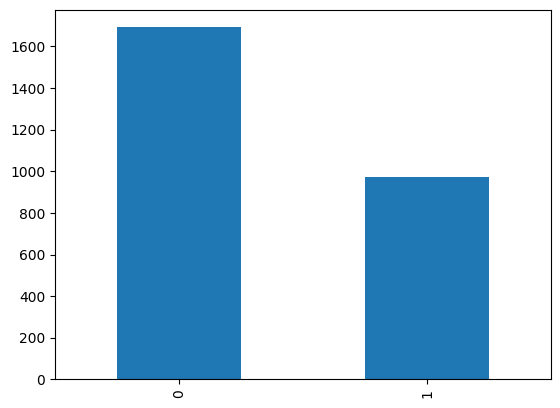

In [12]:
df.Occupancy.value_counts().plot(kind = 'bar')    
# here 0 means not occupied and 1 means occupied 

print("Counts of Occupancy:\n",df.Occupancy.value_counts())

C:\Users\DELL\AppData\Local\Temp\ipykernel_8832\720263284.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

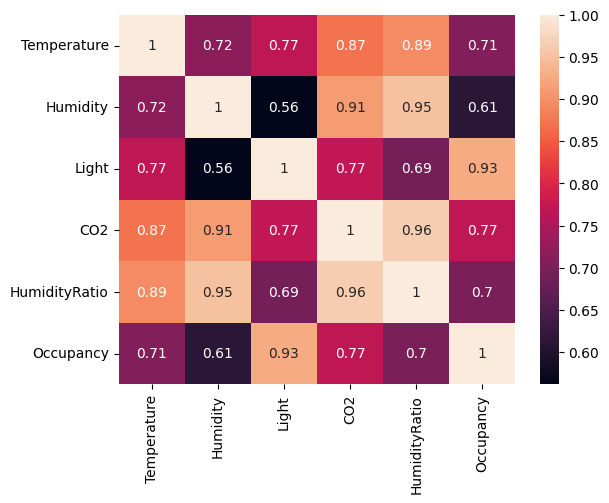

In [13]:
# lets get the dependencies between each features 

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True)

According to the heatmap : the light and co2 make greater impact on Occupancy of a room !! 

co2 is dependent on temp and humidity : 87 % and 91 % 
& light is equally dependent on temp and co2 (76%)



<AxesSubplot: xlabel='date', ylabel='Temperature'>

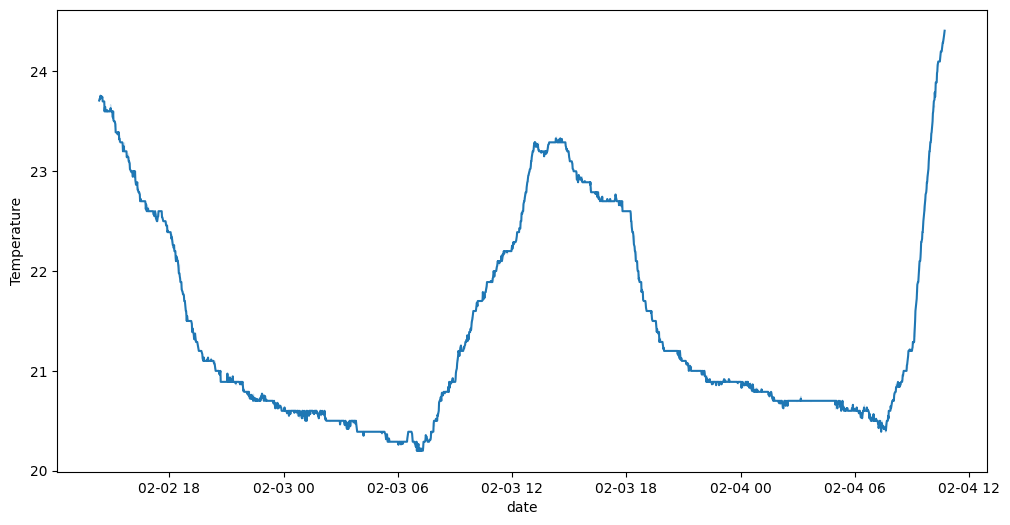

In [14]:
# lets get the fluctuation of temp !!
plt.figure(figsize = (12,6))

sns.lineplot(x = df.date , y = df.Temperature)

When there's a hike in the graph means there is SOMEONE in the room , bcoz the temperature of the room get risen bcoz of the presence of human body !! like on 2-03 12 : there is someone in the room and like 2-03 06 : there is no one in the room that's why temperature of the room decreases !!


<AxesSubplot: xlabel='date', ylabel='Humidity'>

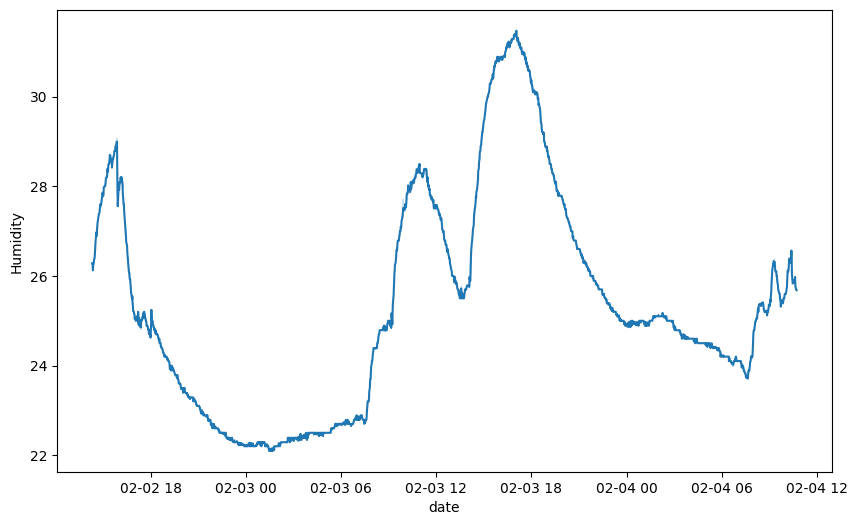

In [15]:
# lets get the fluctuation of humidity overtime
plt.figure(figsize = (10,6))
sns.lineplot(x = df.date , y = df.Humidity)

-- humidity of a room get increases by only two ways :
        1. Outside weather 
        2. any freshner sprinkled in the room or Sweeping is done !!
        
           ** When humidity increase like on 02-03 18 there's a high peak means there are some people in the room !
       
-- so when there's a hike that means there is someone in the room !!

<AxesSubplot: xlabel='date', ylabel='Light'>

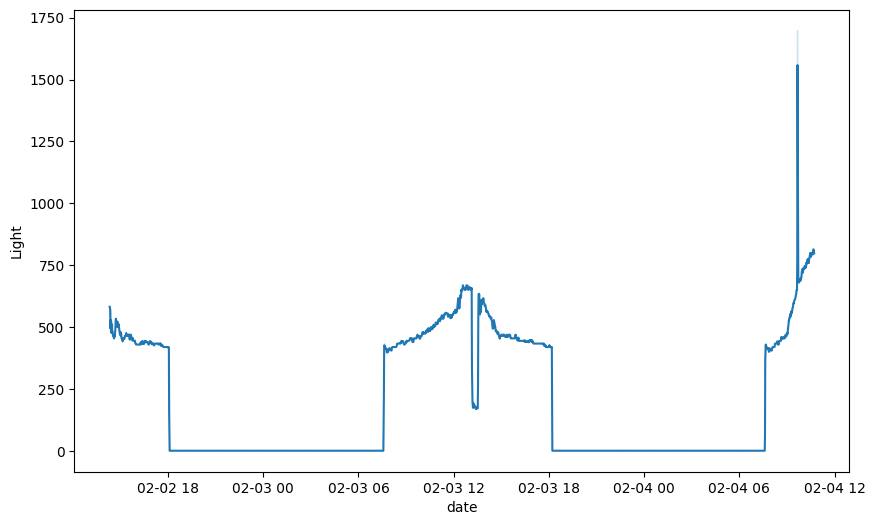

In [16]:
# lets get the fluctuation of light overtime !

plt.figure(figsize = (10,6))
sns.lineplot(x = df.date , y = df.Light)

* there's a light in the room only when there is someone , otherwise the lights are off !!

    -- so when the graphs make a peak , means that the light are on and marks the presence of someOne in the room !!
        
        and when there is constant drop line at bottom like on 02-03 00 there is noone in the room !

<AxesSubplot: xlabel='date', ylabel='CO2'>

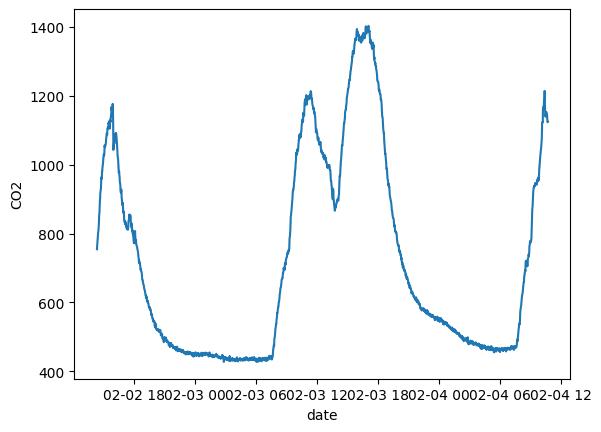

In [17]:
# lets get the fluctuation of co2 overtime !
sns.lineplot(x = df.date , y = df.CO2)


* co2 is directly propotional to the presence of human being 
            -- if there is increase in co2 of a room means there are some humans which are releasing/ exhaling  co2 !!
            
 -- when there's a peak means there are some people in the room ! otherwise when the graph points to bottom means there's NOOne
 

<AxesSubplot: xlabel='Occupancy', ylabel='Temperature'>

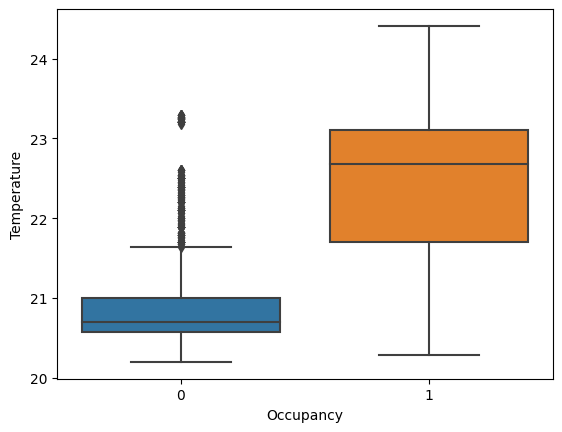

In [18]:
##   ------------ Relation between temperature and Occupancy !! -----------------------

sns.boxplot(x ='Occupancy' , y = 'Temperature' , data = df , )

This graph b/w temperature and occupancy shows when temperature increases means there is a person the room ! bcoz of heat released by a human body !! & Vice versa 



<AxesSubplot: xlabel='Occupancy', ylabel='Light'>

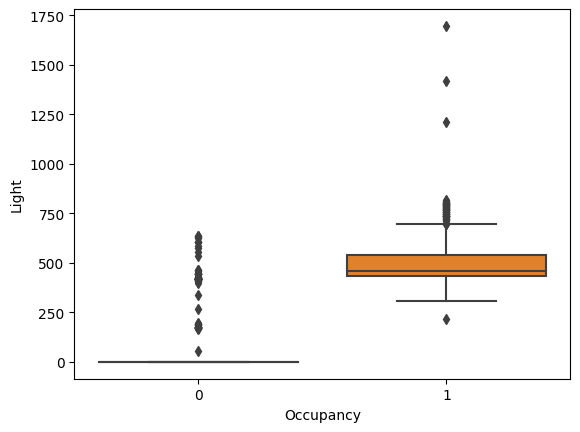

In [19]:
#-------------- Relationship between light and occupancy ------------------

sns.boxplot(x = df.Occupancy , y = df.Light )


* - The intensity of the light is directly proportional with the person in room !!

    bcoz lights get on when there is someOne in the room and the density of the light increases --> Occupied 
    
    &  when the light density decreases means the lights of the room are off and NoOne in the room (not Occupied)!!

<AxesSubplot: xlabel='Occupancy', ylabel='CO2'>

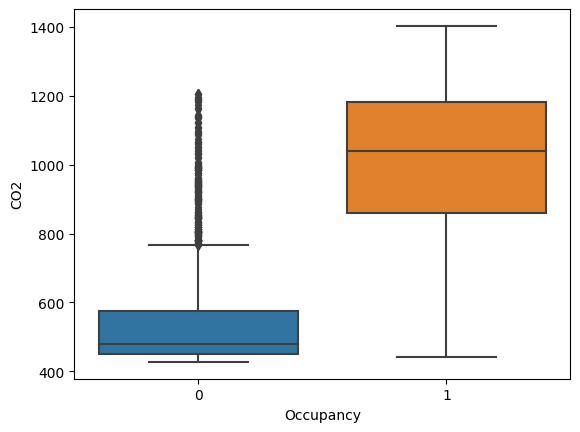

In [20]:
#------------Relationships b/w Co2 and occupancy ---------------

sns.boxplot(x = df.Occupancy , y = df.CO2 )


--- This graph clearly shows when the level of co2 is high in the room means the room is occupied 

    - & when the level of co2 is lower means the room is not occupied !!
    
-- the co2 level of room get increases because of human beings co2 exhalation process so when there is a person in the room the co2 level get increased !! 


# Data processing for model  

In [21]:
#  dropping the non important features from our dataset !!
df.drop(['date', 'Humidity' , 'HumidityRatio'] , axis = 1 , inplace = True)


In [22]:
df.head()

,Temperature,Light,CO2,Occupancy
0,23.7000,585.200000,749.200000,1
1,23.7180,578.400000,760.400000,1
2,23.7300,572.666667,769.666667,1
3,23.7225,493.750000,774.750000,1
4,23.7540,488.600000,779.000000,1


In [23]:
X = df[['Temperature', 'Light', 'CO2']]
y = df.Occupancy


#  Lets divide our data into train and test data 

x_train , x_test , y_train , y_test = train_test_split(X, y ,
                                    test_size = 0.3 , random_state = 42 )

x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1864, 3), (799, 3), (1864,), (799,))

# Model Building

In [24]:
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)       # fitting the model on our train dataset 

# lets print the accuracy of this model 

rfc.score(x_train , y_train)

1.0

In [25]:
y_pred = rfc.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

# Evaluating our model 

In [26]:
from sklearn.metrics import accuracy_score 

score= accuracy_score(y_test, y_pred)

score
# accuracy of our model is 98.74 % 

0.9874843554443054

In [27]:
#  lets generate a classification report of our model 

from sklearn.metrics import classification_report

print("Classification report :---------\n", classification_report(y_test , y_pred))

Classification report :---------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       515
           1       1.00      0.96      0.98       284

    accuracy                           0.99       799
   macro avg       0.99      0.98      0.99       799
weighted avg       0.99      0.99      0.99       799



Text(50.722222222222214, 0.5, 'Predicted')

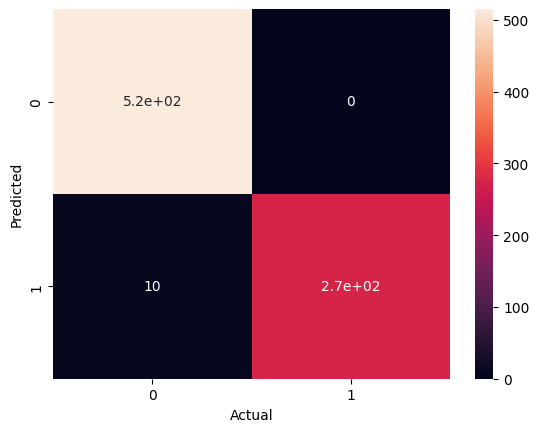

In [28]:
# generating its confusion matrix ---------

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
sns.heatmap(confusion_matrix(y_test , y_pred ), annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [29]:
# lets get the confusion matrix values 

tn,fp,fn,tp=confusion_matrix(y_test,y_pred).ravel()
print("True negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True negatives:  515
False Positives:  0
False Negatives:  10
True Positives:  274


C:\Users\DELL\AppData\Local\Temp\ipykernel_8832\3742839254.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8832\3742839254.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

<AxesSubplot: xlabel='Occupancy', ylabel='Density'>

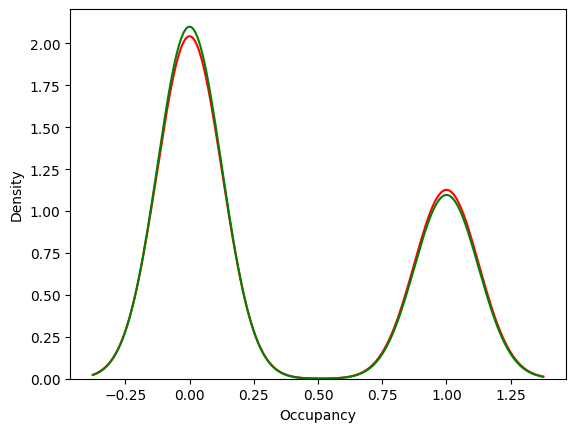

In [30]:
# Distplot showing the distribution between the predicted and actual values 

ax = sns.distplot(y_test , hist = False ,label = 'Actual' , color = 'r')

sns.distplot(y_pred , hist = False , label = 'Predicted' , color='g' ,ax = ax  )



# Conclusion : 
    
        -- The model used above RandomForestClassifier have a higher accuracy of 98%  and you also saw it in the evaluation part
                
                & this is the best fit !!
            
            
                -- on the basis of EDA i conclude that the occupation of room is mainly dependent on [temperature , Light , CO2] present in the room which help to calculate the the occupation of room these are the most important features 
                according to the data which i have !!
                